In [4]:
import pandas as pd
idataset = pd.read_csv('insurance.csv')

In [5]:
idataset.shape

(1338, 7)

In [6]:
idata = dataset.sample(frac=0.95, random_state=462)
idata_unseen = dataset.drop(idata.index)

idata.reset_index(drop=True, inplace=True)
idata_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(idata.shape))
print('Unseen Data For Predictions: ' + str(idata_unseen.shape))

Data for Modeling: (1271, 7)
Unseen Data For Predictions: (67, 7)


In [8]:
from pycaret.regression import *
exp_reg101 = setup(data = idata, target = 'charges', session_id=123, silent = True) 

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1271, 7)"
3,Missing Values,0
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(889, 14)"


In [9]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2509.6114,20753630.6125,4504.7433,0.8632,0.4257,0.2954,0.0610
lightgbm,Light Gradient Boosting Machine,2719.0528,21709814.2413,4626.9112,0.8551,0.5434,0.3318,0.0450
rf,Random Forest Regressor,2618.1526,22226485.4228,4683.9090,0.8527,0.4467,0.3116,0.2180
et,Extra Trees Regressor,2613.8652,25564543.8474,5010.9441,0.8314,0.4431,0.2863,0.1990
ada,AdaBoost Regressor,4205.2862,26803829.1310,5158.4704,0.8207,0.6007,0.6871,0.0210
llar,Lasso Least Angle Regression,4059.4786,35795269.9082,5956.2248,0.7607,0.6297,0.4140,0.0080
ridge,Ridge Regression,4080.7915,35843463.8000,5960.4112,0.7605,0.5946,0.4176,0.0070
lasso,Lasso Regression,4065.2360,35841730.0000,5960.0269,0.7604,0.5977,0.4152,0.0070
br,Bayesian Ridge,4076.0666,35848191.7640,5960.7411,0.7604,0.5957,0.4168,0.0070
lr,Linear Regression,4065.0602,35852173.8000,5960.9205,0.7603,0.6023,0.4151,0.4030


In [10]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [11]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2972.8262,27227955.7673,5218.0414,0.8302,0.4863,0.2760
1,2477.1258,21137791.1269,4597.5854,0.8454,0.4566,0.2788
2,3175.6432,32556101.4900,5705.7954,0.8076,0.4922,0.3576
3,2287.3883,14176536.0798,3765.1741,0.8828,0.3479,0.2926
4,2417.3471,19042408.1902,4363.7608,0.8937,0.4590,0.3362
5,2315.3646,19241250.0270,4386.4849,0.8475,0.4500,0.3011
6,2402.7393,19908491.3721,4461.8932,0.8724,0.4155,0.2693
7,2274.8289,13496515.1052,3673.7603,0.9089,0.3698,0.3025
8,2065.6322,13037363.6313,3610.7290,0.9230,0.3928,0.2595
9,2707.2188,27711893.3351,5264.2087,0.8200,0.3866,0.2806


In [12]:
print(gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [13]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3232.0961,28633472.9507,5351.0254,0.8215,0.5572,0.2581
1,3589.3071,30263687.1936,5501.2441,0.7786,0.6457,0.4918
2,3773.7061,36889616.1084,6073.6823,0.7820,0.6373,0.6199
3,3036.8014,20119623.8828,4485.4904,0.8337,0.6779,0.4623
4,3052.2754,23386890.4325,4835.9994,0.8694,0.7822,0.5019
5,2903.1737,23202150.0043,4816.8610,0.8161,0.7125,0.3900
6,3068.5724,26318098.2687,5130.1168,0.8314,0.7826,0.4064
7,2997.9281,20950587.7753,4577.1812,0.8586,0.6036,0.4958
8,2789.6693,16531053.3653,4065.8398,0.9024,0.4268,0.3087
9,3238.3700,31107379.2339,5577.3990,0.7980,0.6000,0.3731


In [14]:
print(tuned_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls', max_depth=7,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.02, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=230,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.85, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


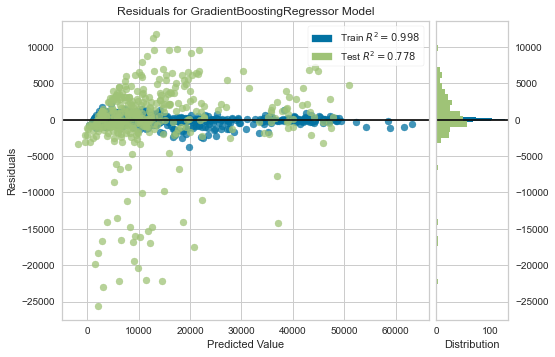

In [15]:
plot_model(tuned_gbr)

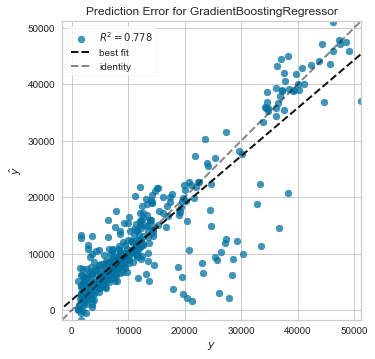

In [16]:
plot_model(tuned_gbr, plot = 'error')

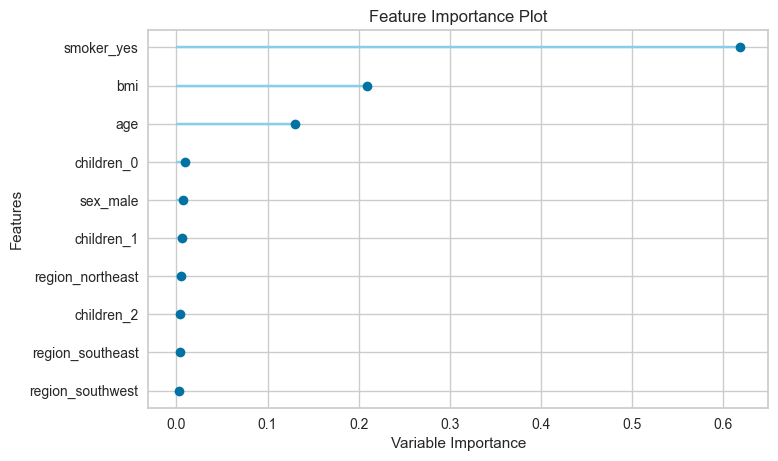

In [17]:
plot_model(tuned_gbr, plot='feature')

In [18]:
evaluate_model(tuned_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [19]:
predict_model(tuned_gbr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,3240.8566,29893106.7568,5467.4589,0.7784,0.6249,0.4229


In [20]:
final_gbr = finalize_model(tuned_gbr)

In [21]:
print(final_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls', max_depth=7,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.02, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=230,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.85, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [22]:
predict_model(final_gbr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,584.6162,1273306.7562,1128.4089,0.9906,0.1730,0.0983


In [23]:
unseen_predictions = predict_model(final_gbr, data=idata_unseen)
unseen_predictions.head()

,age,sex,bmi,children,smoker,region,charges,Label
0,31,female,25.74,0,no,southeast,3756.6216,4069.840378
1,37,male,29.83,2,no,northeast,6406.4107,17288.652828
2,23,male,34.40,0,no,southwest,1826.8430,3688.027472
3,55,male,38.28,0,no,southeast,10226.2842,12044.995801
4,56,male,19.95,0,yes,northeast,22412.6485,24335.925323


In [25]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.charges, unseen_predictions.Label, 'R2')

0.7166